<a href="https://colab.research.google.com/github/reagenhuskey/cs290/blob/main/k_nearest_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
iris = load_iris()

In [83]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [84]:
df['species'] = iris.target

In [85]:
target_names = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

df['species_name'] = df['species'].map(target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [86]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [87]:
def random_centroid(df, k):
  sample = df.sample(k).drop(columns=['species','species_name'])
  return sample.reset_index(level = 0, drop=True)

In [88]:
random_centroid(df, 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.4,3.0,1.3,0.2
1,5.8,2.6,4.0,1.2
2,5.5,2.5,4.0,1.3


In [89]:
random_centroid(df, 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,5.5,3.5,1.3,0.2
2,4.8,3.0,1.4,0.3


In [90]:
def draw_clusters(df, centroids, iter):
  plt.figure(figsize=(5, 3))
  #plot each cluster
  sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", data = df, hue = "species_name")
  #plot centroids
  sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", data = centroids, c = "black", marker="X", s = 200, label="centroids")

  plt.title(f"Iteration {iter}")
  plt.legend()
  plt.show()

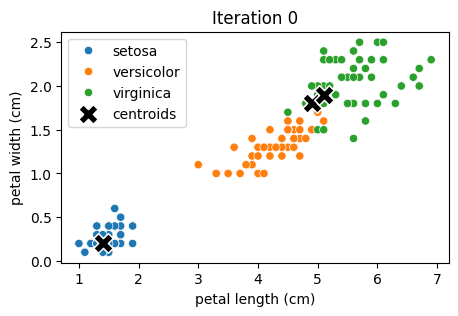

In [91]:
draw_clusters(df, random_centroid(df, 3), 0)

In [92]:
def clusters(df, centroids):
  og_centroids = pd.DataFrame()
  iter = 0
  #run while new centroids are different from the old ones
  while not og_centroids.equals(centroids):
    #update og centroids
    og_centroids = centroids.copy()
    for i in df.index: # each point in df
      distances = [] # distances from current point to each centroid
      #for each centroid/row
      for _, row in centroids.iterrows():
        #calculate the euclidean distance from current point to the current row/centroid.
        distances.append(euclidean_distance(df.loc[i, ['petal length (cm)', 'petal width (cm)']], row))
      best_cluster = np.argmin(distances)
      df.loc[i, 'best_cluster'] = best_cluster #update centroids

    draw_clusters(df, centroids, iter)
    iter += 1
    #recalculate centroids
    centroids = df.groupby('best_cluster')[['petal length (cm)', 'petal width (cm)']].mean()
  return df # after centroids have been stabilized, return df now that it contains cluster assignments

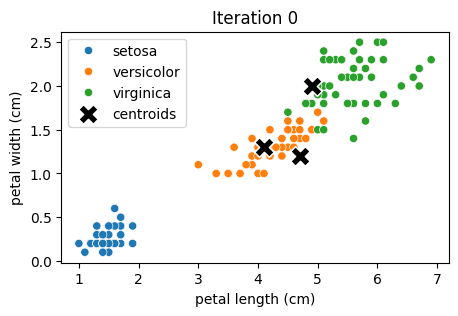

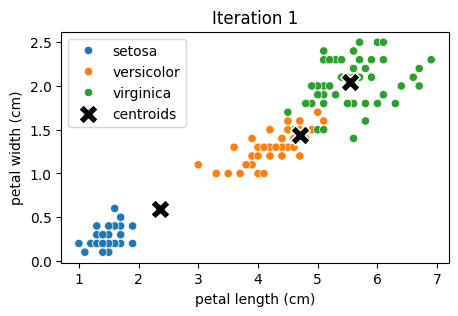

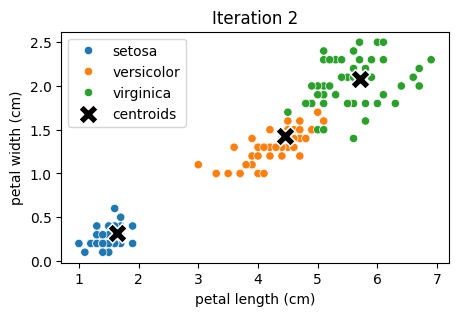

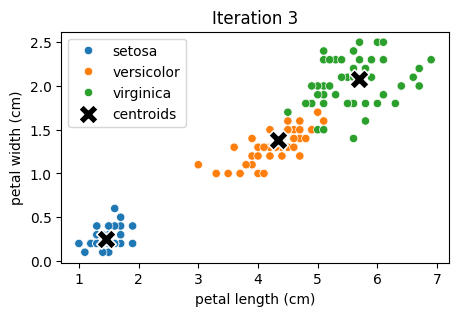

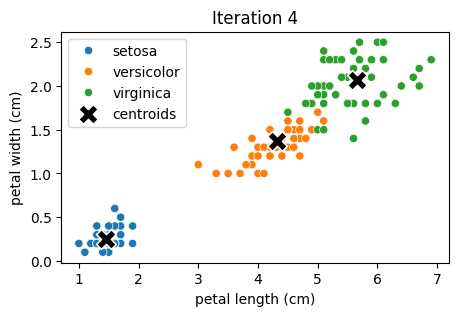

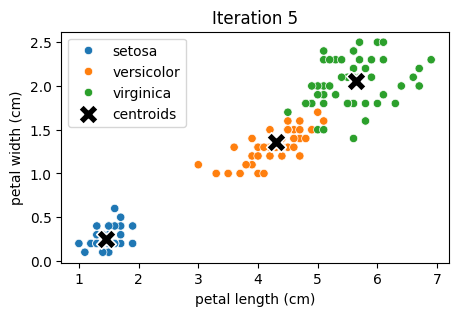

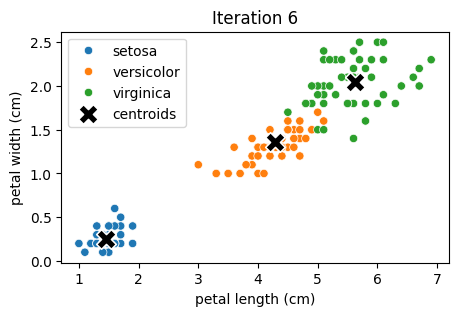

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name,best_cluster
0,5.1,3.5,1.4,0.2,0,setosa,0.0
1,4.9,3.0,1.4,0.2,0,setosa,0.0
2,4.7,3.2,1.3,0.2,0,setosa,0.0
3,4.6,3.1,1.5,0.2,0,setosa,0.0
4,5.0,3.6,1.4,0.2,0,setosa,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2.0
146,6.3,2.5,5.0,1.9,2,virginica,2.0
147,6.5,3.0,5.2,2.0,2,virginica,2.0
148,6.2,3.4,5.4,2.3,2,virginica,2.0


In [93]:
clusters(df, random_centroid(df, 3))

# Inertia

In [94]:
def find_inertia(df, centroids):
  inertia = []
  for i in df.index:
    distances = []
    cluster = df.loc[i, 'best_cluster']
    distances.append(euclidean_distance(df.loc[i, ['petal length (cm)', 'petal width (cm)']], centroids.loc[cluster]))
    inertia.append(np.sum(distances))
  return np.sum(inertia)

In [95]:
inertia = find_inertia(df, random_centroid(df, 3))

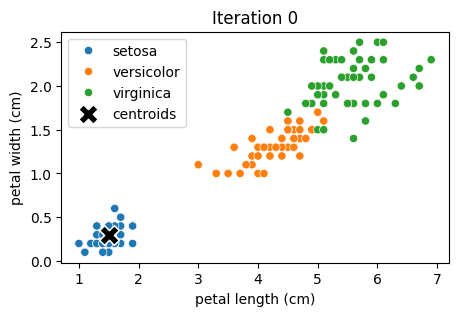

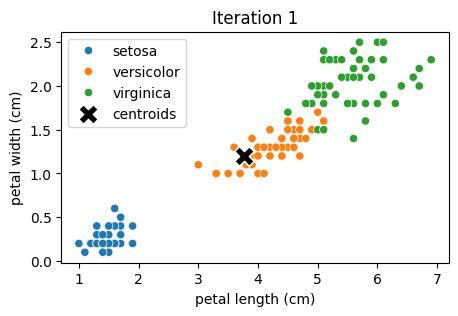

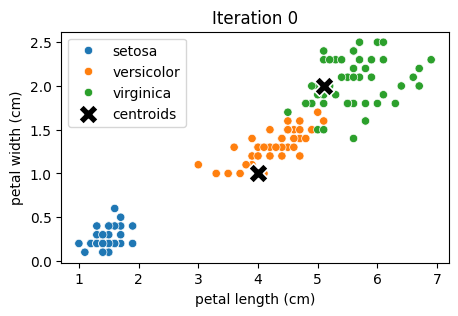

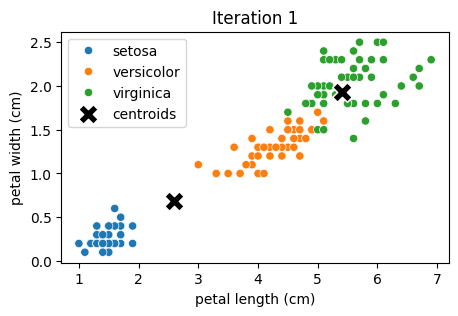

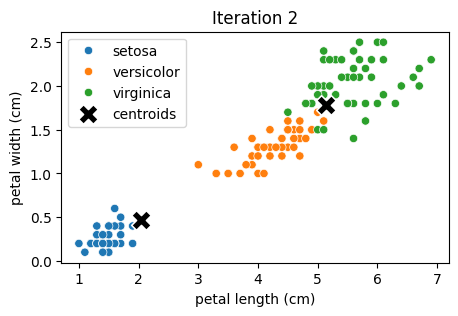

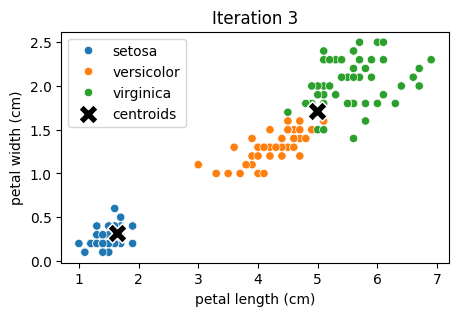

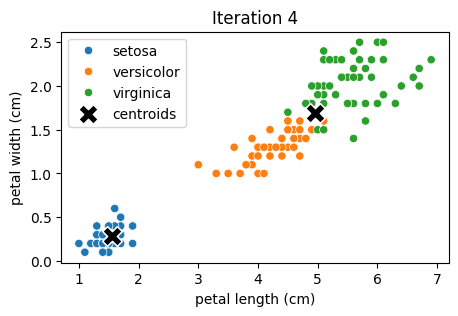

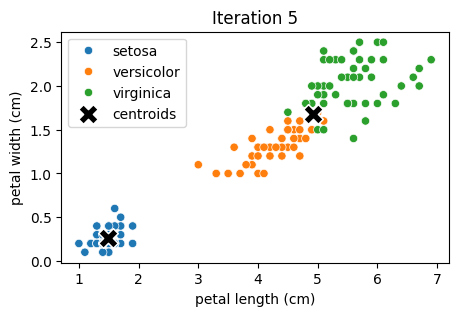

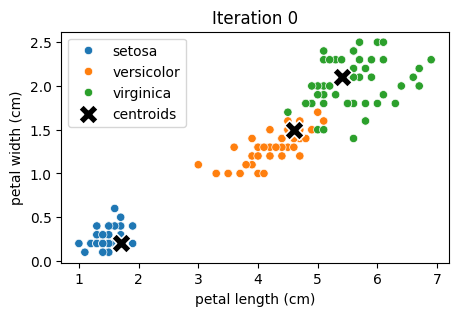

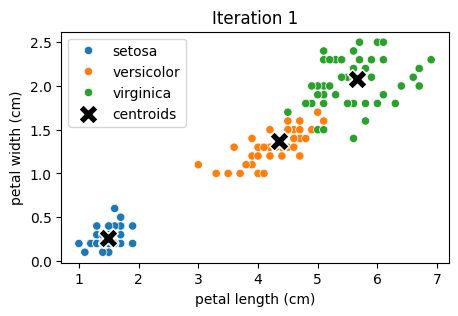

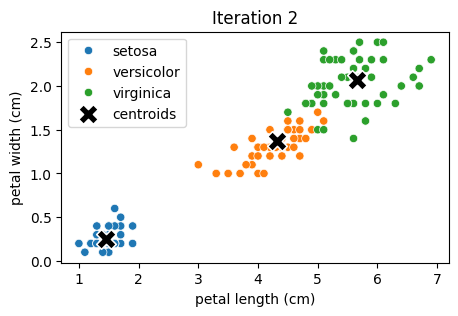

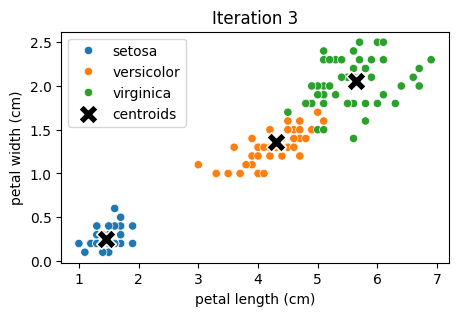

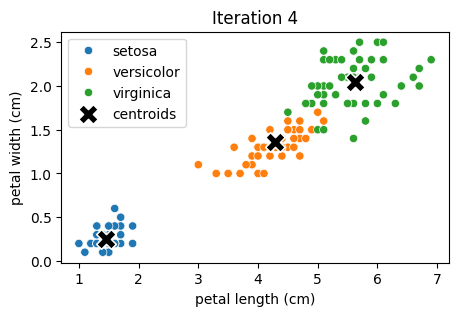

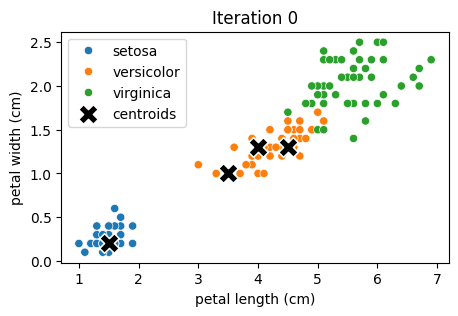

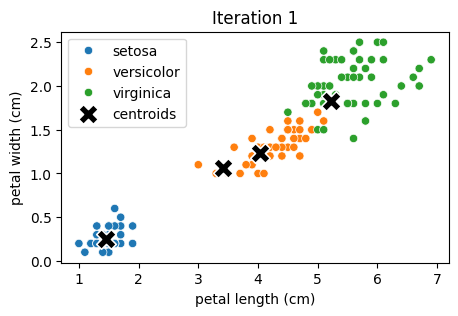

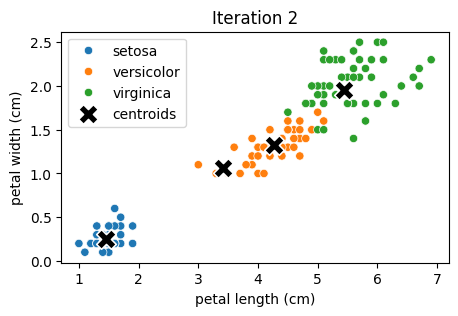

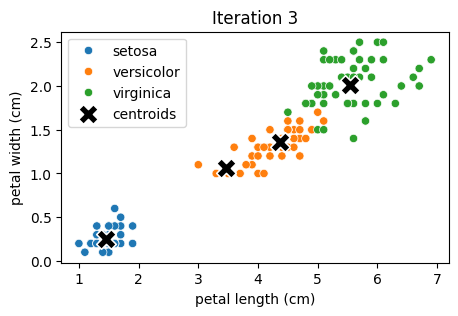

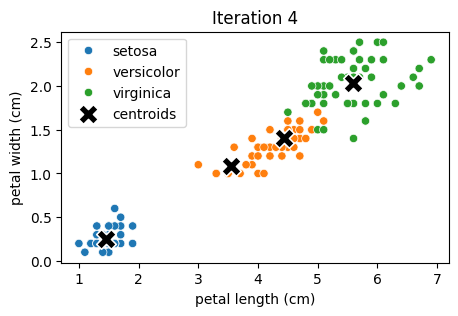

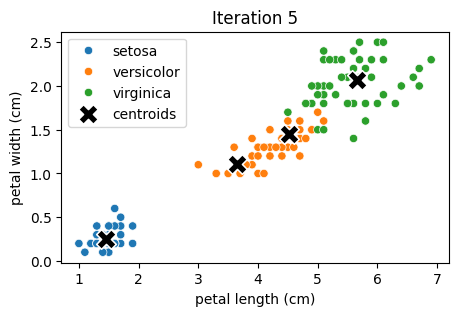

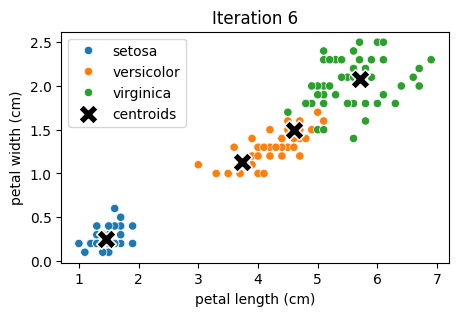

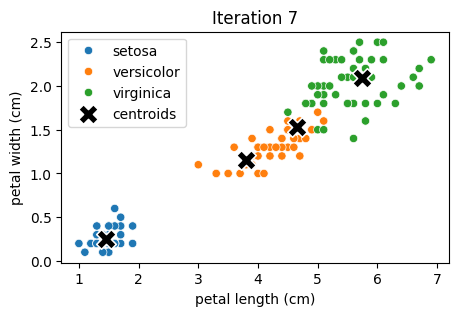

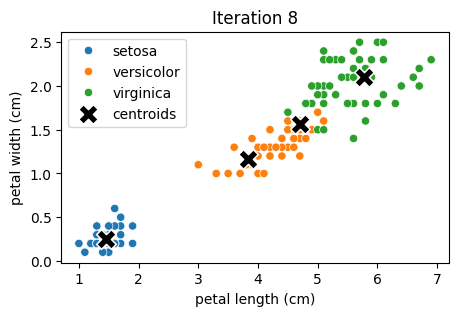

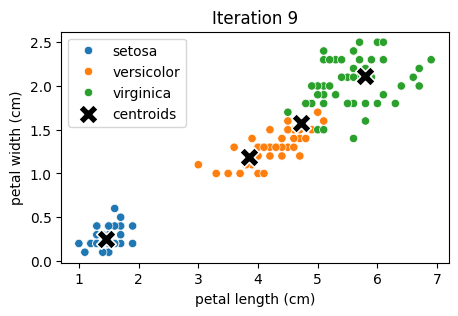

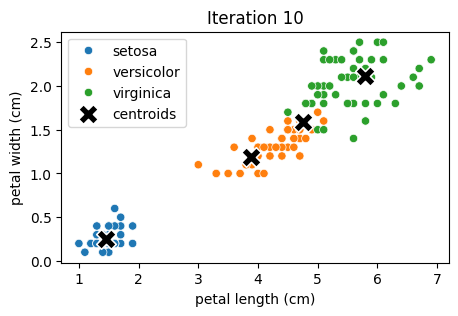

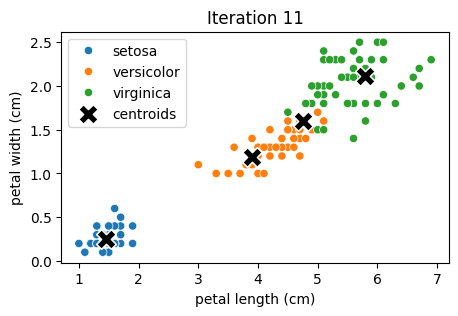

KeyboardInterrupt: 

In [96]:
inertias = []
#for i in range(1, 11):
 # centroids = random_centroid(df, i)
  #df = clusters(df, centroids)
  #inertias.append(find_inertia(df, centroids))